# Checking Freshwater River Runoff

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm

In [2]:
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)

In [26]:
runoff = xr.open_dataset('/g/data/ua8/JRA55-do/RYF/v1-3/RYF.runoff_all.1990_1991.nc').friver
#area = xr.open_dataset('/g/data/ik11/inputs/JRA-55/RYF/v1-4/RYF.friver.1990_1991.nc').area
runoff=runoff*area

In [6]:
friver = cc.querying.getvar(expt='panant-v3', variable='friver', session=session)
areacello = cc.querying.getvar(expt='panant-v3', variable='areacello', session=session,n=-1)

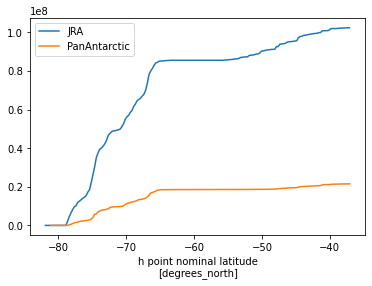

In [31]:
## Plot January runoff, cumulatively integrating from South.
runoff.isel(time=slice(0,31)).mean('time').sum('longitude').cumsum('latitude').sel(latitude=slice(-82,-37)).plot(label='JRA')
(friver*areacello).mean('time').sum('xh').cumsum('yh').plot(label='PanAntarctic')
plt.legend()

In [24]:
area = np.ones([720,1440])
lon,lat = np.meshgrid(runoff.longitude.values,runoff.latitude.values)
area = area*110e3**2/16*np.cos(np.pi*lat/180)

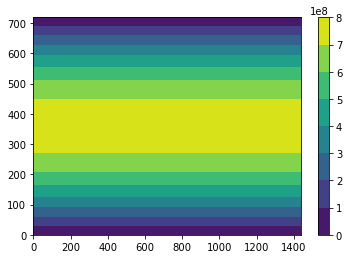

In [25]:
plt.contourf(area)
plt.colorbar()

In [23]:
xr.open_dataset('/g/data/ua8/JRA55-do/RYF/v1-3/RYF.runoff_all.1990_1991.nc')

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, time: 365)
Coordinates:
  * latitude   (latitude) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float64 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time       (time) object 1900-01-01 00:00:00 ... 1900-12-31 00:00:00
Data variables:
    friver     (time, latitude, longitude) float32 ...
Attributes:
    title:        River runoff into the ocean of JRA55-do
    institution:  JMA Meteorological Research Institute
    comment:      River routing model CaMaFlood forced by JRA-55 runoff from ...
    version:      v1.1
    fill_value:   Fill value is -9.99e33